In [1]:
import pandas as pd

In [10]:
a_pass = pd.read_csv("international-airline-passengers.csv")
car_1960 = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")
sales_1_6 = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
#mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
#dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
#female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [11]:
a_pass.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [12]:
car_1960.head()

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [13]:
sales_1_6.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


# Отображение графика

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
all_series = {
    "international-airline-passengers": a_pass["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"],
    "monthly-car-sales-in-quebec-1960": car_1960["Count"],
    "monthly-sales-of-company-x-jan-6": sales_1_6["Count"]
    
}

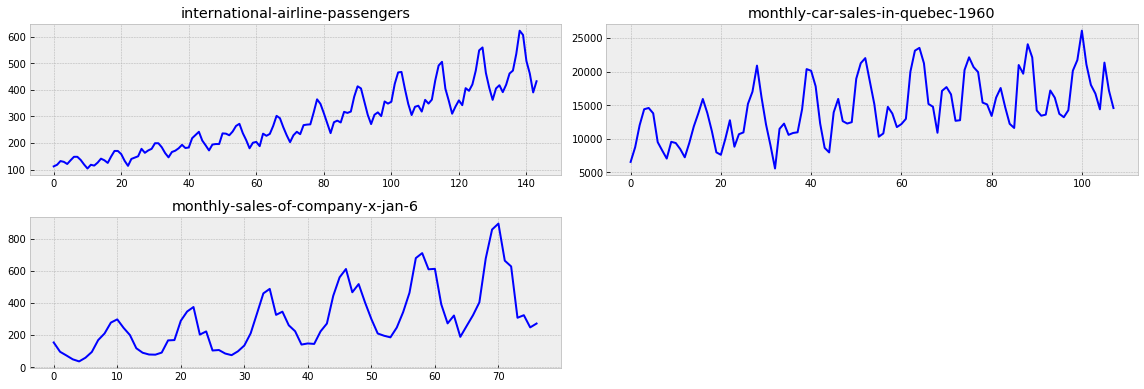

In [16]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [17]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

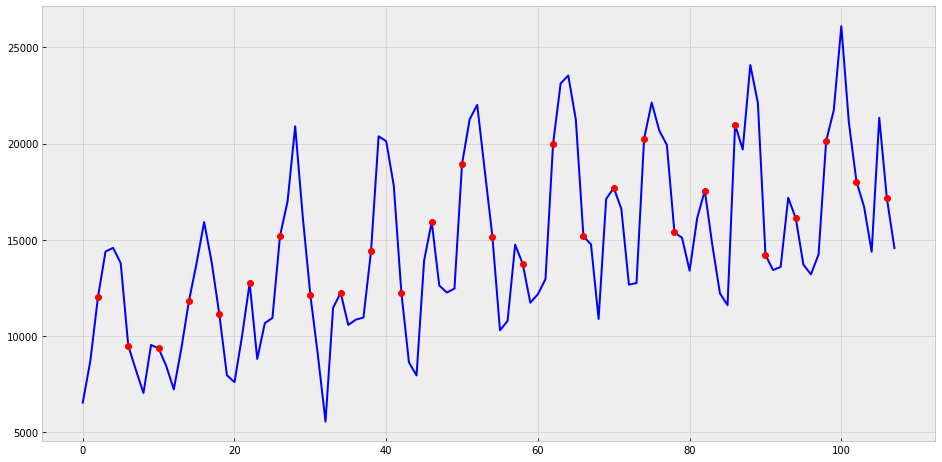

In [19]:
plot_ts_and_points(car_1960['Count'], 2, 4)

# Нормализуем дисперсию

In [24]:
from scipy.stats import boxcox

In [26]:
series = boxcox(all_series["monthly-car-sales-in-quebec-1960"], 0)

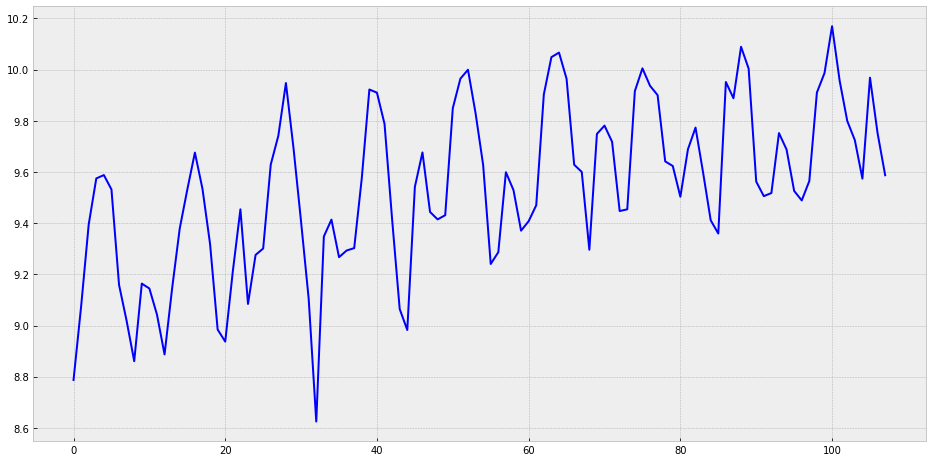

In [27]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Дифференцируем 

In [28]:
import numpy as np

In [29]:
series = np.diff(series, 1)

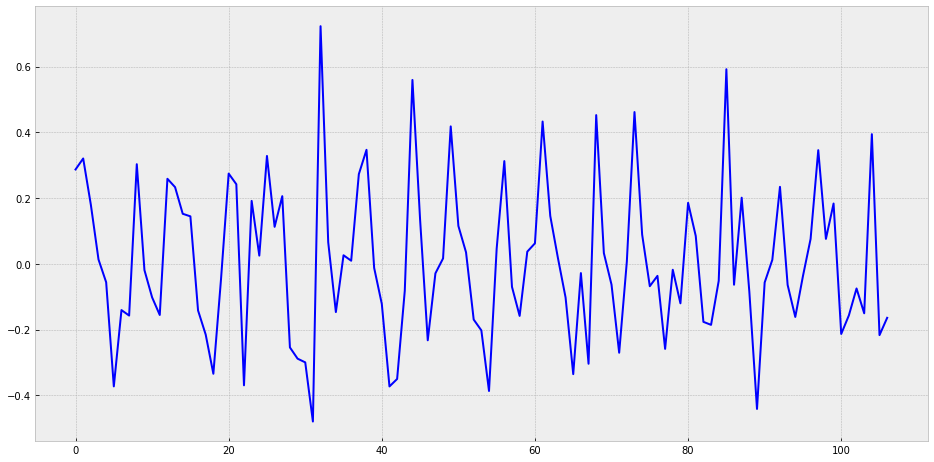

In [30]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Тест Дики-Фуллера 

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [33]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [35]:
test_stationarity(all_series["monthly-car-sales-in-quebec-1960"])

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


# Коррелограммы

In [36]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [37]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

C:\Users\karasev.vf\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


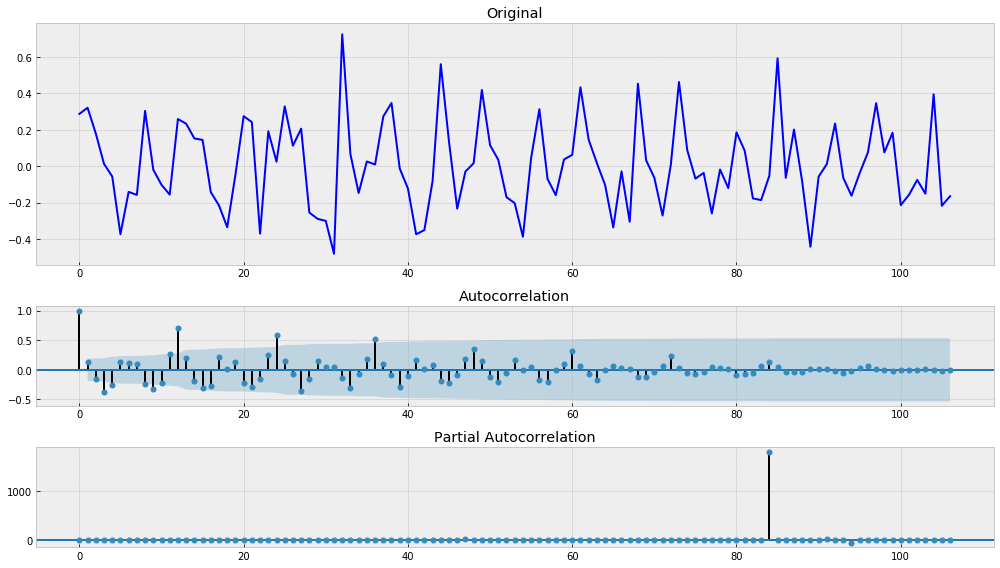

In [38]:
tsplot(series)

C:\Users\karasev.vf\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


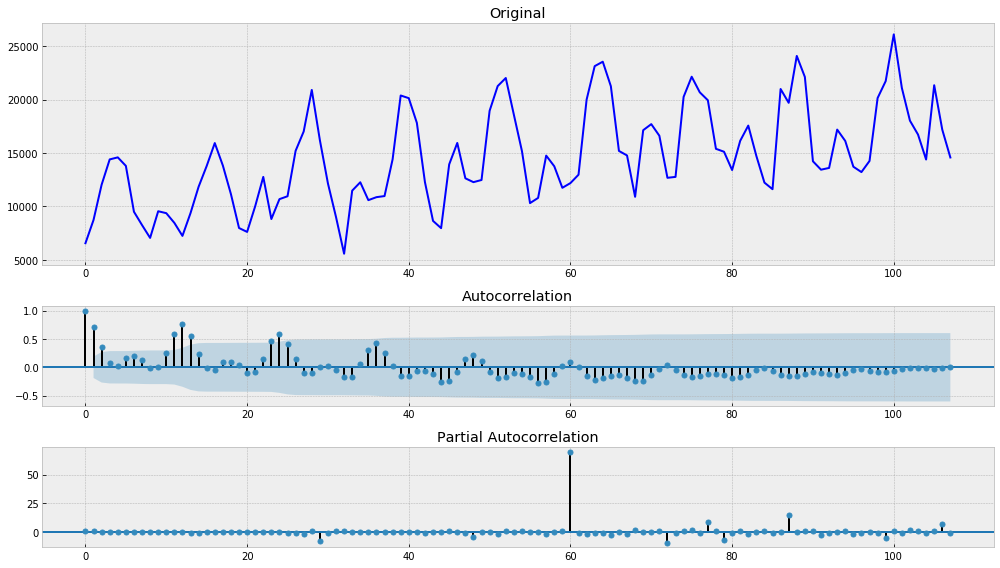

In [39]:
tsplot(all_series["monthly-car-sales-in-quebec-1960"])